# Logistic Regression

#### Heart Disease 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
data=pd.read_csv(r"E:\PYTHON\python Datasets\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [46]:
data.target.unique()

array([1, 0], dtype=int64)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [5]:
from pandas_profiling import ProfileReport
Report=ProfileReport(data)
Report.to_file(output_file='HeartReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Data Exploration

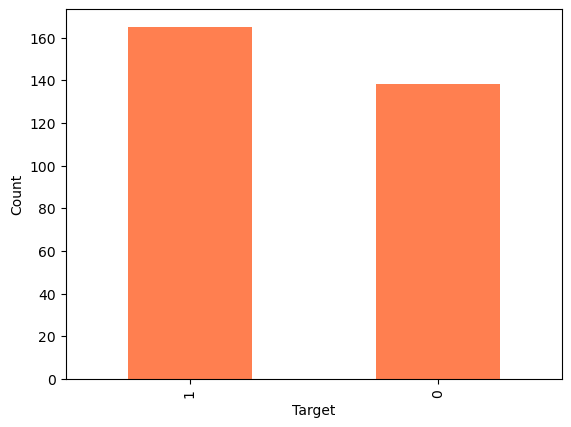

In [33]:
data.target.value_counts().plot(kind='bar',color='Coral')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

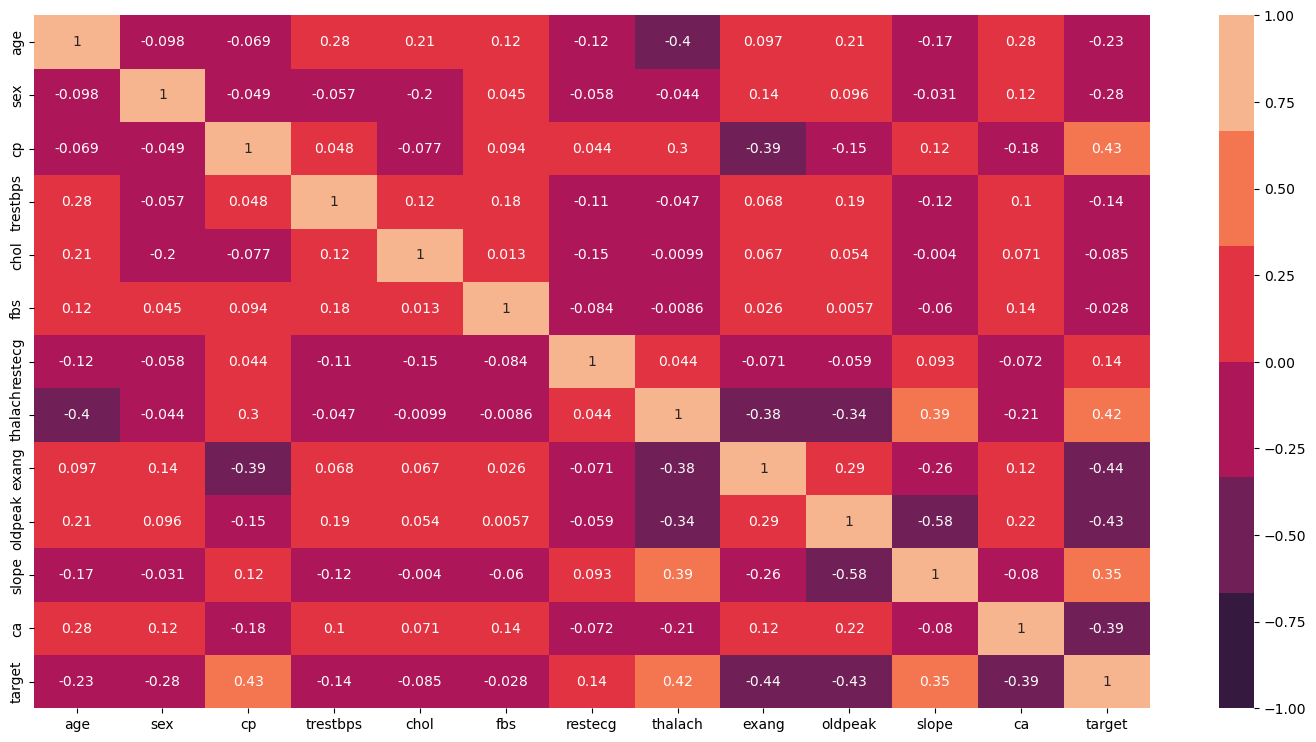

In [31]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot=True,cmap=sns.color_palette("rocket"),vmin=-1,vmax=1)

#### Feature selection

In [35]:
#univarite 
from sklearn.feature_selection import SelectKBest, f_regression

df = data.iloc[:,:]

result_df = pd.DataFrame(columns=['column_name', 'score'])

# Loop over all columns in the dataframe
for col_name in df.columns:
    X = df[[col_name]]
    y = df['target']

    # Apply univariate feature selection to the current column
    selector = SelectKBest(score_func=f_regression, k=1)
    selector.fit(X, y)

    # Get the score of the selected feature
    score = selector.scores_[0]

    new_data = {'column_name': [col_name], 'score': [score]}
    new_df = pd.DataFrame(data=new_data)
    result_df = pd.concat([result_df, new_df], ignore_index=True)


result_df = result_df.sort_values(by='score', ascending=False)

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: divide by zero encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [36]:
result_df

,column_name,score
12,target,inf
8,exang,70.952438
2,cp,69.772271
9,oldpeak,68.551439
7,thalach,65.120104
11,ca,54.559834
10,slope,40.902071
1,sex,25.792191
0,age,16.116700
3,trestbps,6.458169


In [47]:
data.drop(columns=data[['fbs','chol','restecg','trestbps']],axis=1,inplace=True)

In [48]:
data.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,150,0,2.3,0,0,1
1,37,1,2,187,0,3.5,0,0,1
2,41,0,1,172,0,1.4,2,0,1
3,56,1,1,178,0,0.8,2,0,1
4,57,0,0,163,1,0.6,2,0,1


#### separating independent and dependent Variables

In [81]:
x=data.drop('target',axis=1)
y=data.target

In [82]:
x.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca
0,63,1,3,150,0,2.3,0,0
1,37,1,2,187,0,3.5,0,0
2,41,0,1,172,0,1.4,2,0
3,56,1,1,178,0,0.8,2,0
4,57,0,0,163,1,0.6,2,0


In [83]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### finding collinearity

<AxesSubplot:>

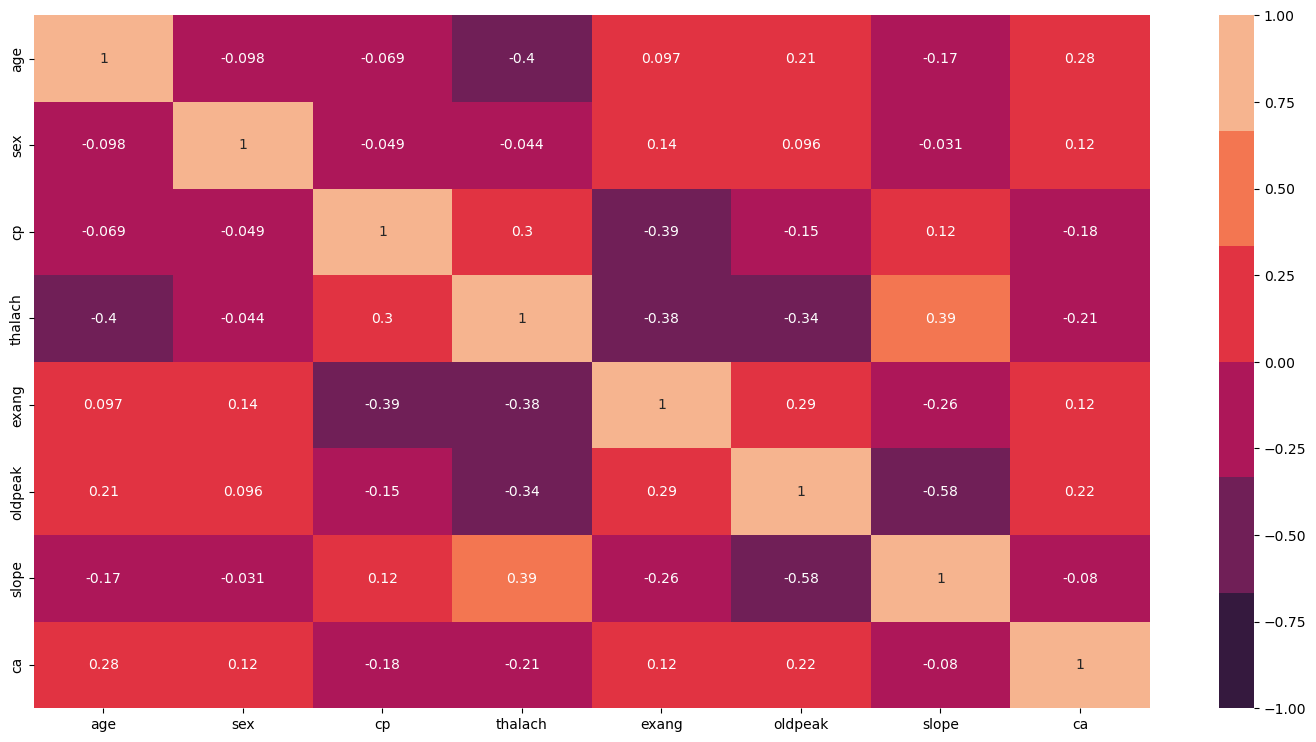

In [84]:
plt.figure(figsize=(18,9))
sns.heatmap(x.corr(),annot=True,cmap=sns.color_palette("rocket"),vmin=-1,vmax=1)

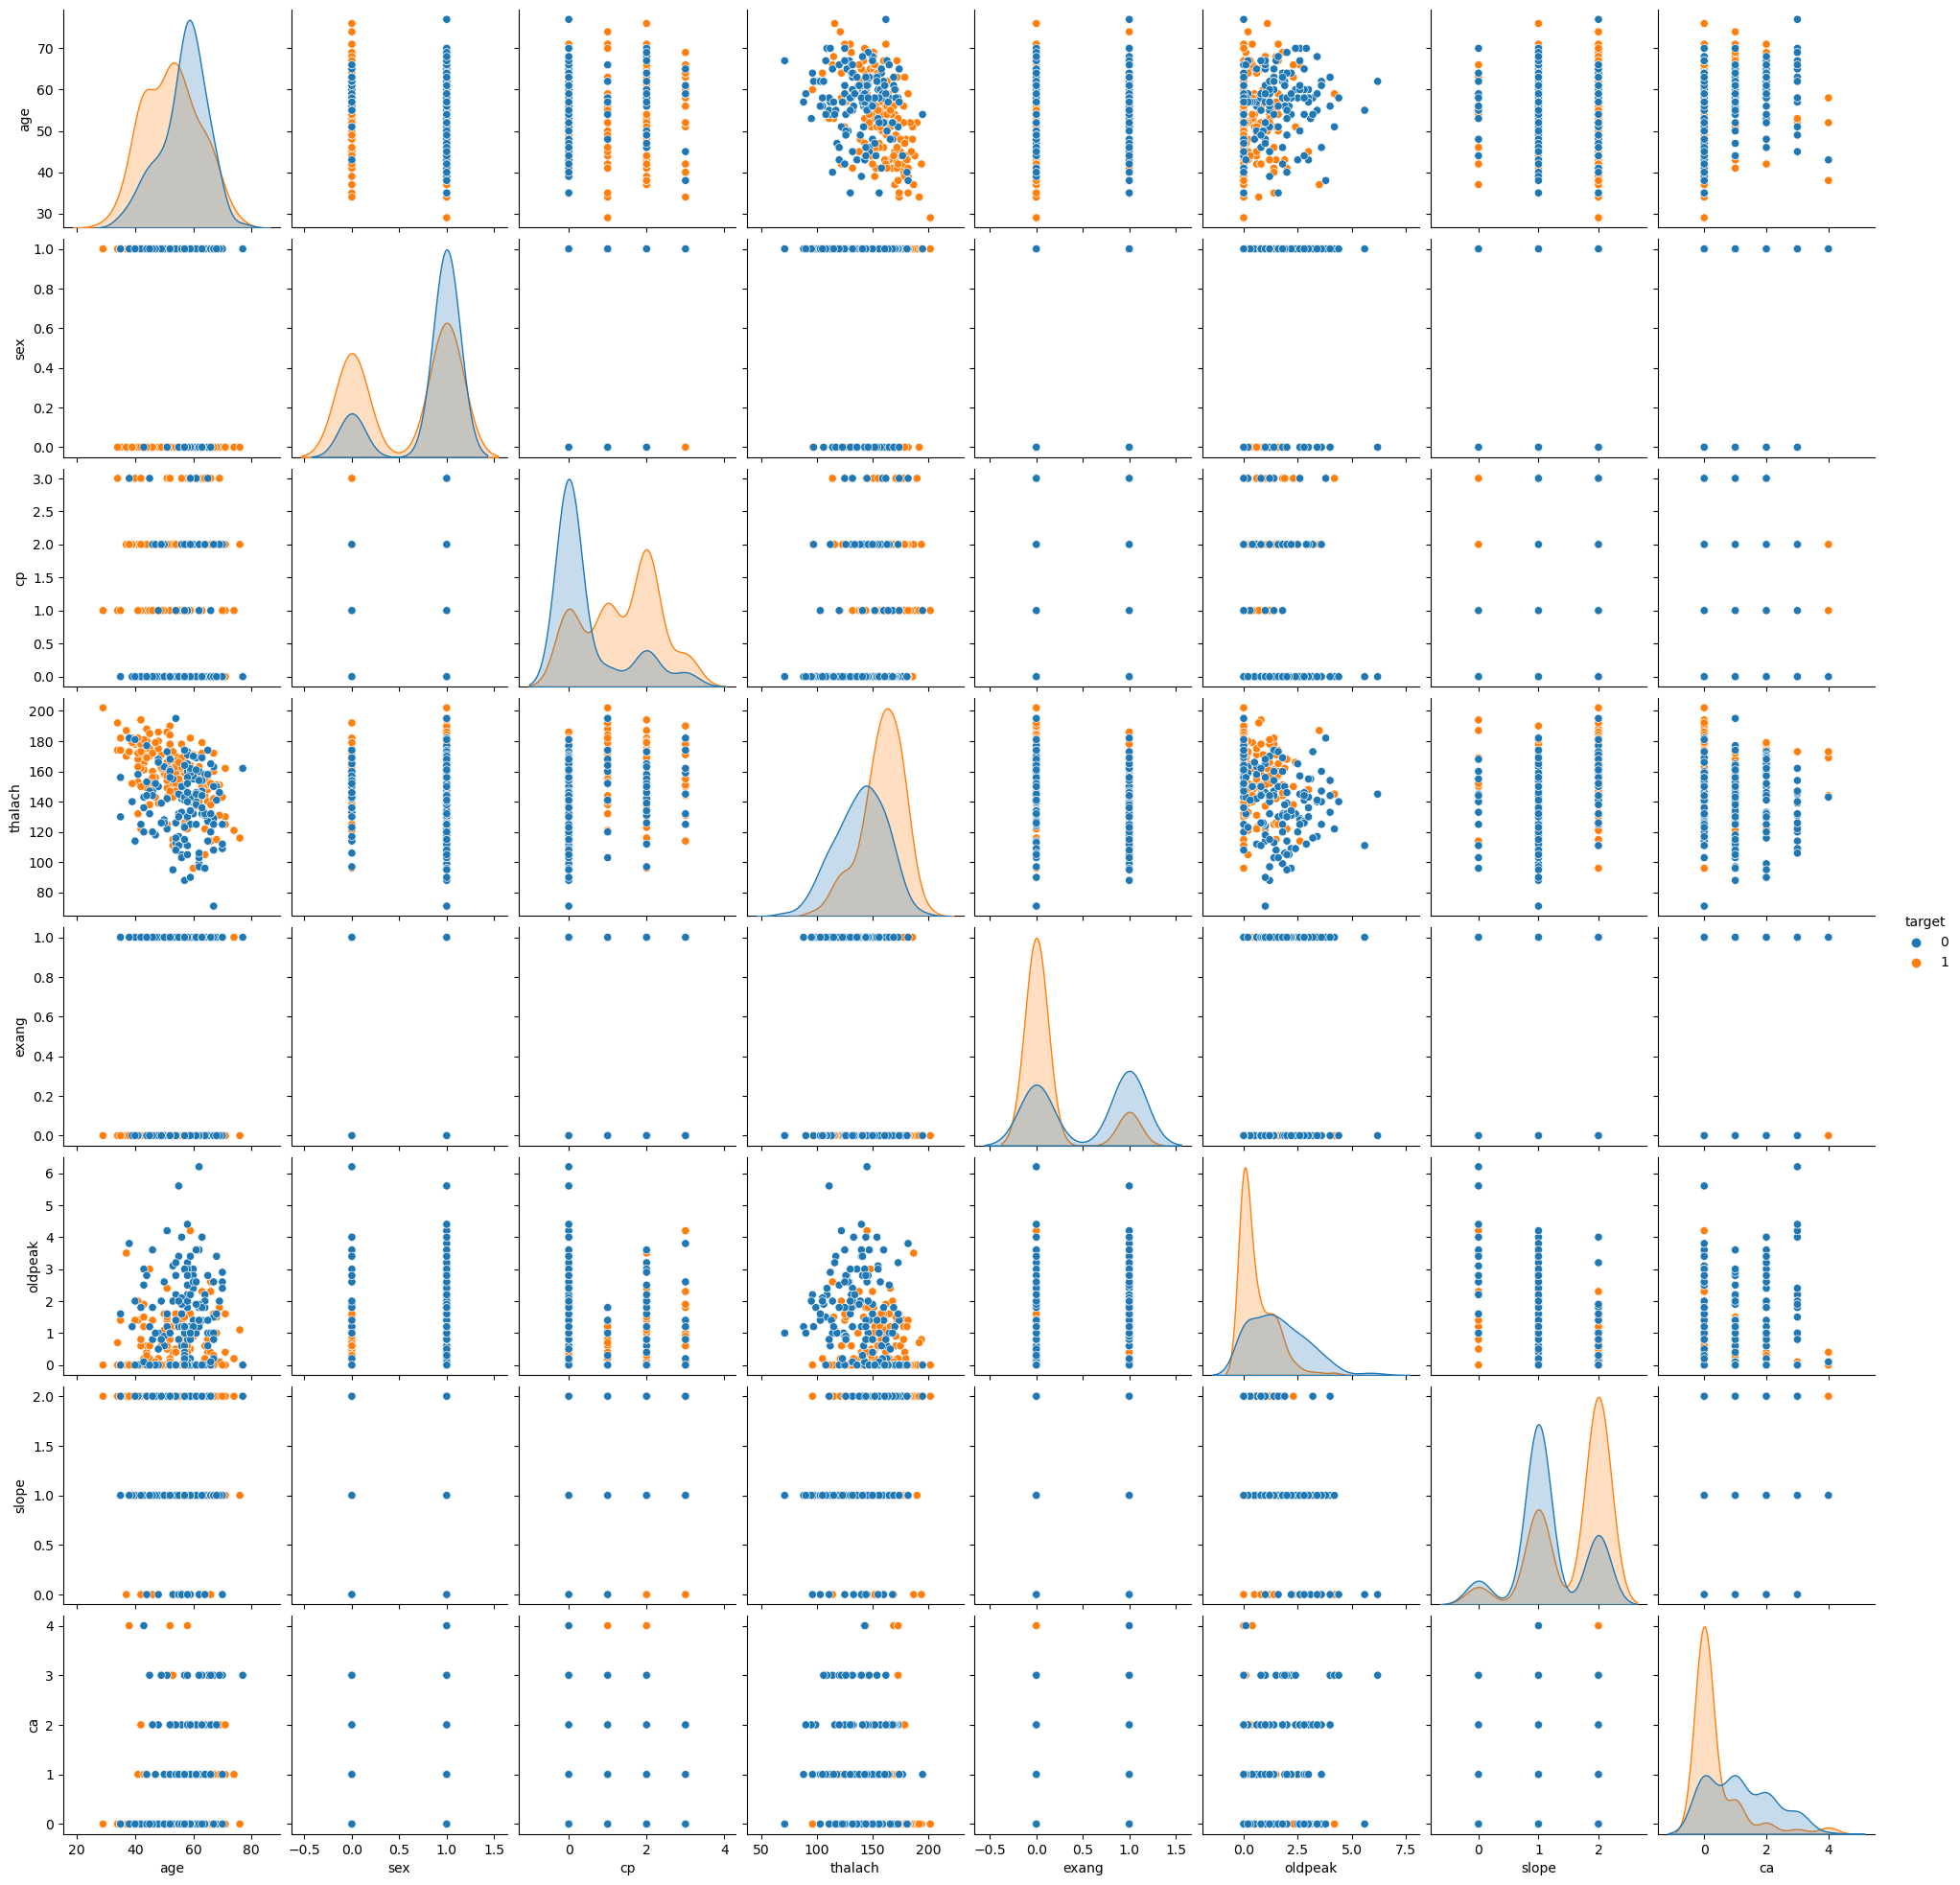

In [68]:
sns.pairplot(data,hue='target')
plt.show()

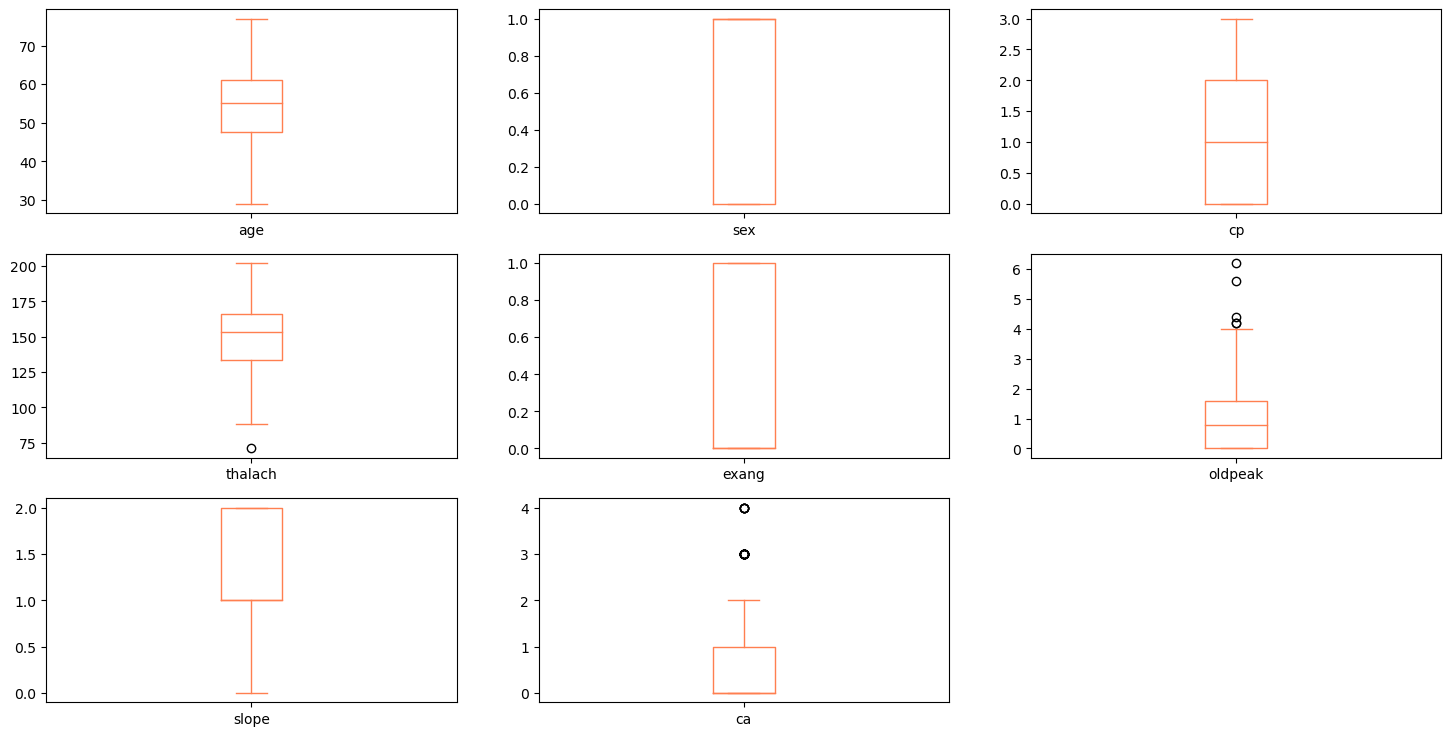

In [72]:
x.plot(kind='box',subplots=True,layout=(3,3),color='Coral',figsize=(18,9))
plt.show()

#### train test

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 8), (61, 8), (242,), (61,))

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#### LogisticRegression

In [88]:
from sklearn.linear_model import LogisticRegression
heart=LogisticRegression()

#train our model
heart.fit(x_train,y_train)

LogisticRegression()

In [89]:
#predicting
y_pred=heart.predict(x_test)

In [92]:
y_proba=heart.predict_proba(x_test)

In [96]:
y_proba[:,0] #probabilty of true

array([0.97533979, 0.83686354, 0.12201158, 0.02329739, 0.3849436 ,
       0.83377932, 0.8863484 , 0.28273   , 0.58943897, 0.32376728,
       0.06964833, 0.00859445, 0.0474085 , 0.85215864, 0.98798116,
       0.42814572, 0.82338867, 0.87027307, 0.02795229, 0.90519682,
       0.54570831, 0.96366386, 0.98749426, 0.72310008, 0.92081284,
       0.06141995, 0.78173012, 0.91009282, 0.21210256, 0.77651848,
       0.96888968, 0.06034784, 0.09423908, 0.19259495, 0.0298801 ,
       0.98191653, 0.99085791, 0.93607701, 0.57483576, 0.60922823,
       0.48141881, 0.93574284, 0.23559831, 0.72348802, 0.98557498,
       0.98740959, 0.12101192, 0.01480516, 0.99011587, 0.05527861,
       0.11663898, 0.93182878, 0.06654213, 0.98934033, 0.16844884,
       0.04272863, 0.02986524, 0.63522167, 0.75349416, 0.49249387,
       0.99189682])

#### Evaluation

In [97]:
heart.score(x_test,y_test)

0.8360655737704918

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cmr=classification_report(y_test,y_pred)

In [100]:
cm

array([[26,  2],
       [ 8, 25]], dtype=int64)

In [101]:
print(cmr)

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        28
           1       0.93      0.76      0.83        33

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



#### Roc curve

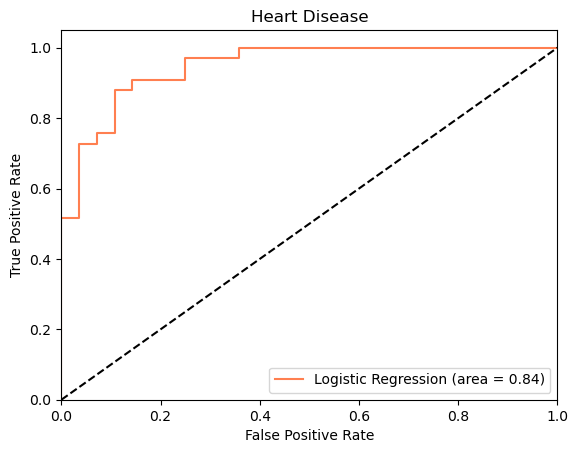

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, heart.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc ,c='Coral')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart Disease')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()